In [1]:
import pandas as pd
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt

# set plot size larger
sns.set(rc={"figure.figsize": (11.7, 8.27)})
# set seaborn style
sns.set_style("whitegrid")

In [2]:
train_data_melted = process_data("data/train.xlsx")
train_data_melted

,Date,Hour,Price
0,2007-01-01,1,24.31
1096,2007-01-01,2,24.31
2192,2007-01-01,3,21.71
3288,2007-01-01,4,8.42
4384,2007-01-01,5,0.01
...,...,...,...
21919,2009-12-31,20,36.00
23015,2009-12-31,21,29.00
24111,2009-12-31,22,24.82
25207,2009-12-31,23,31.28


## Random action


In [13]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
log = []
num_episodes = 50  # Define the number of episodes

for episode in range(num_episodes):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()  # Select a random action
        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward


    log.append({
        'Episode': episode + 1,
        'Total Reward': total_reward[0]
    })

    # print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

env.close()  # Close the environment when done

In [14]:
log = pd.DataFrame(log)
log

,Episode,Total Reward
0,1,146826.750000
1,2,-91995.585938
2,3,-83549.640625
3,4,-24650.916016
4,5,22443.025391
5,6,-50398.777344
6,7,129566.875000
7,8,-51126.187500
8,9,19779.072266
9,10,-53866.007812


<Axes: xlabel='Episode', ylabel='Total Reward'>

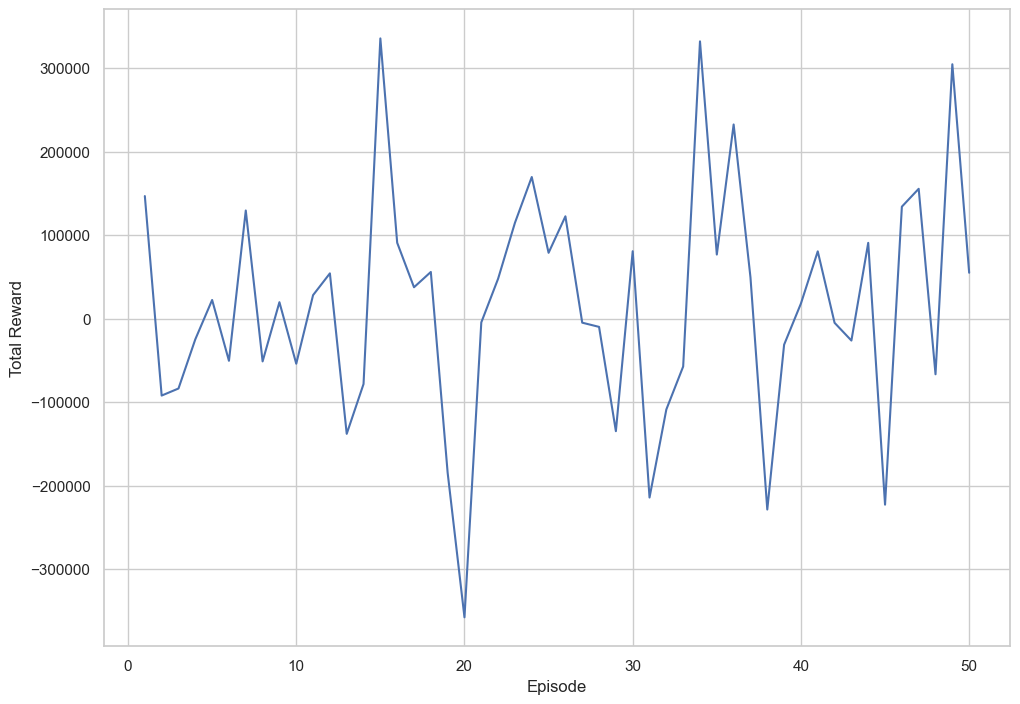

In [15]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

In [6]:
env = SmartGridBatteryEnv(train_data_melted)

# Create the agent
agent = QLearningAgent(env.action_space)

# Run the training loop
num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state

AttributeError: 'Box' object has no attribute 'n'